<a href="https://colab.research.google.com/github/sagsshakya/Machine-Learning/blob/master/Machine%20Learning%20LAB/Q18_PCA_and_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q18. PCA and K - Means Clustering.
### Problem Statement:
    A python  program  to  explore  your  data  with  matplotlib  and  PCA,  preprocess  your data  with  normalization.  Split  the  data  into  training  and  test  sets. construct  an unsupervised  model (K-means  algorithm)  to  fit  the  model  to  the data, predict values, and validate the model that is built.

# Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd

In [5]:
iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Exploratory Data Analysis.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

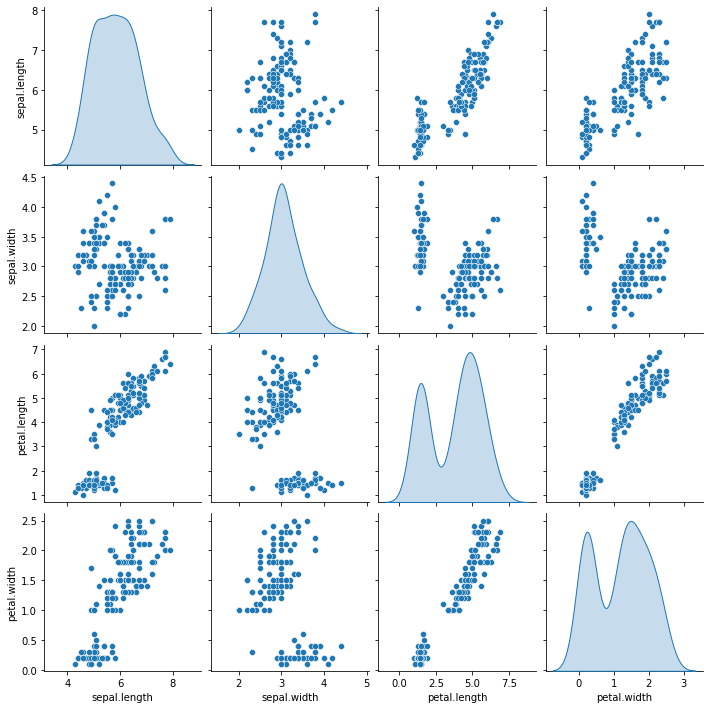

In [6]:
# Without hue.
sns.pairplot(iris, diag_kind = 'kde')

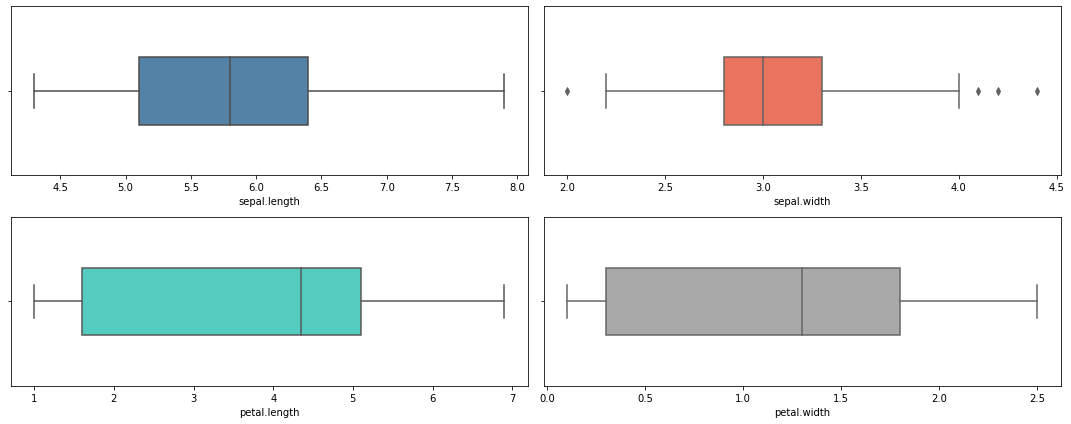

In [7]:
# Any Potential outliers?
plt.figure(figsize = (15,6))
colors = ['steelblue', 'tomato', 'turquoise', 'darkgray']
for ii, col in enumerate(iris.columns.values[:-1], 1):
    plt.subplot(2,2,ii)
    sns.boxplot(x = iris[col],hue = iris['variety'],color = colors[ii-1],width = .4)
plt.tight_layout()
plt.show()

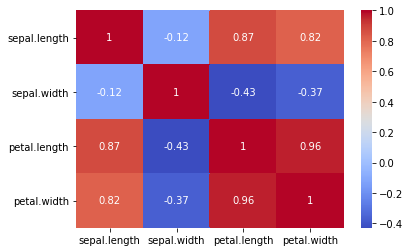

In [8]:
# Creating a Correlation matrix.
corr = iris.corr()
# Heatmap.
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

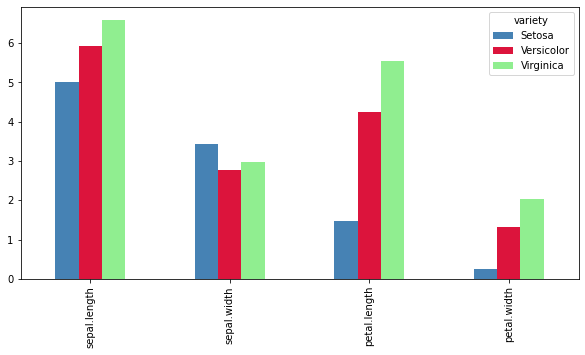

In [10]:
# Grouping the features on the basis of variety and calculating their grouped mea
grouped_data = iris.groupby('variety')[iris.columns.values].mean()

# Study the properties of each feature according to the species type.
grouped_data.T.plot(kind = 'bar',
                    color = ['steelblue', 'crimson', 'lightgreen'],
                    figsize = (10,5))

# Using Principal Component Analysis to reduce the dimensions.
- We have four features (or dimensions). We will reduce it to two using PCA.

In [22]:
# First we separate the numeric features.
numeric = iris.drop(['variety'], axis = 1).values

# Standardizing the numeric features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric)

# Finding the principal components >> Reducing from 4 dimensional space to 2 dime
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principle_components = pca.fit_transform(X_scaled)

# Components.
principle_iris = pd.DataFrame(data = principle_components,
                              columns = ['Principle Component 1', 'Principle Component 2'])

# Label Encoding the target labels in iris dataset.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
principle_iris['labels'] = encoder.fit_transform(iris['variety'])
principle_iris.head(3)

,Principle Component 1,Principle Component 2,labels
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


In [23]:
# Eigen vector.
print('Eigen vector:')
print(pca.components_.round(2))
print()

# Eigen values.
print('Eigen values:')
print(pca.explained_variance_.round(2))
print()

# Percentage of variance explained.
print('Percentage of variance explained:')
print(pca.explained_variance_/ np.sum(pca.explained_variance_))


Eigen vector:
[[ 0.52 -0.27  0.58  0.56]
 [ 0.38  0.92  0.02  0.07]]

Eigen values:
[2.94 0.92]

Percentage of variance explained:
[0.76150718 0.23849282]


# K - Means Clustering using the principal components.

In [24]:
X = principle_iris.drop(['labels'], axis = 1)
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=3)
clus.fit(X)

# Print Centroids.
print(clus.cluster_centers_.round(2))

[[ 1.72  0.6 ]
 [-2.22  0.29]
 [ 0.57 -0.81]]


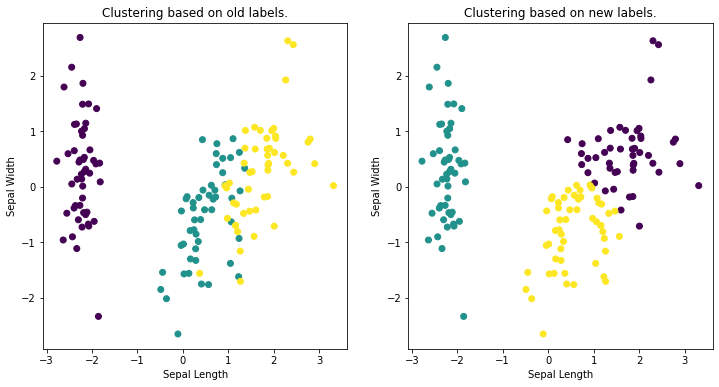

In [26]:
# EDA on the data based on old labels.
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.scatter(X['Principle Component 1'], X['Principle Component 2'],
            c = principle_iris.labels.values)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clustering based on old labels.')

# EDA on the data based on new labels.
new_labels = clus.labels_
plt.subplot(1,2,2)
plt.scatter(X['Principle Component 1'], X['Principle Component 2'],
            c = new_labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clustering based on new labels.')

plt.show()